Importing all the modules

In [1]:
import datetime as dt
import pandas as pd
from pandas.api.types import is_list_like
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as data
import matplotlib.pyplot as pt
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure


Specifying the Date

In [2]:
end = dt.date.today()
start = dt.datetime(end.year,end.month-1,end.day)

Collecting the Data set

In [3]:
com_df1 = pd.DataFrame(data.DataReader('BSE/BOM524715', 'quandl', start=start, end=end )['Close'])    #Sun_Pharma

In [4]:
com_df2 = pd.DataFrame(data.DataReader('BSE/BOM500087', 'quandl', start=start, end=end )['Close'])    #Cipla

In [5]:
com_df3 = pd.DataFrame(data.DataReader('BSE/BOM500302', 'quandl', start=start, end=end )['Close'])    #Piramal_Enter

In [6]:
com_df4 = pd.DataFrame(data.DataReader('BSE/BOM532321', 'quandl', start=start, end=end )['Close'])    #Cadila_Health

In [7]:
com_df5 = pd.DataFrame(data.DataReader('BSE/BOM500257', 'quandl', start=start, end=end )['Close'])    #Lupin

Renaming the close columns

In [8]:
Sun_Pharma = com_df1.rename(columns={'Close':'Sun_Pharma'})
Cipla = com_df2.rename(columns={'Close':'Cipla'})
Piramal_Enter = com_df3.rename(columns={'Close':'Piramal_Enter'})
Cadila_Health = com_df4.rename(columns={'Close':'Cadila_Health'})
Lupin = com_df5.rename(columns={'Close':'Lupin'})

Joinig all the data frames

In [9]:
close_df = (((Sun_Pharma.join(Cipla, how="outer")).join(Piramal_Enter, how="outer")).join(Cadila_Health, how="outer")).join(Lupin,how="outer")

In [10]:
close_df

,Sun_Pharma,Cipla,Piramal_Enter,Cadila_Health,Lupin
Date,,,,,
2018-08-14,601.65,641.95,2837.25,340.05,832.50
2018-08-13,562.75,626.65,2780.90,354.55,811.25
2018-08-10,553.60,620.90,2807.10,376.50,808.05
2018-08-09,570.70,619.25,2872.50,377.95,820.75
2018-08-08,572.55,633.40,2872.40,375.15,825.85
2018-08-07,569.55,628.70,2906.60,372.95,865.05
2018-08-06,575.60,637.10,2811.15,380.00,871.85
2018-08-03,584.85,640.55,2797.70,377.00,886.25
2018-08-02,579.50,638.15,2851.80,375.55,865.00


In [11]:
import seaborn as sns
sns.set_style('whitegrid')

In [12]:
rets = close_df.pct_change()                                    #returns -- one day percent change for each of the stocks
rets.head()

,Sun_Pharma,Cipla,Piramal_Enter,Cadila_Health,Lupin
Date,,,,,
2018-08-14,NaN,NaN,NaN,NaN,NaN
2018-08-13,-0.064656,-0.023834,-0.019861,0.042641,-0.025526
2018-08-10,-0.016259,-0.009176,0.009421,0.061909,-0.003945
2018-08-09,0.030889,-0.002657,0.023298,0.003851,0.015717
2018-08-08,0.003242,0.022850,-0.000035,-0.007408,0.006214


# Pair Plotting

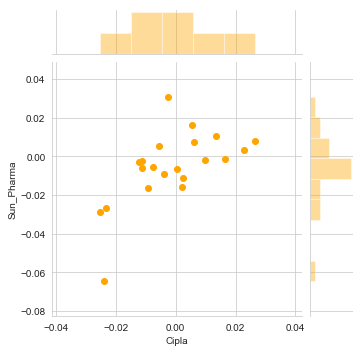

In [13]:
sns.jointplot('Cipla','Sun_Pharma',rets, kind='scatter',height=5, color='orange')

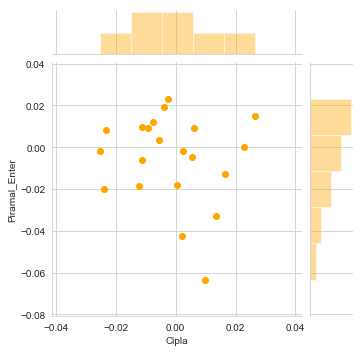

In [14]:
sns.jointplot('Cipla','Piramal_Enter',rets, kind='scatter',height=5, color='orange')

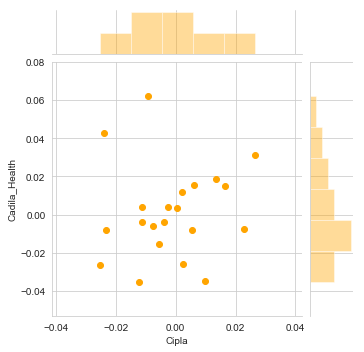

In [15]:
sns.jointplot('Cipla','Cadila_Health',rets, kind='scatter',height=5, color='orange')

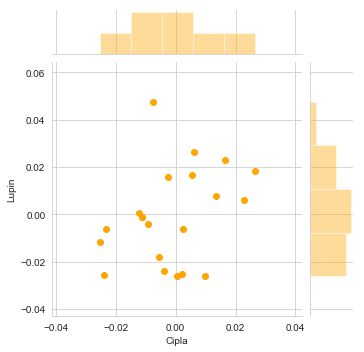

In [18]:
sns.jointplot('Cipla','Lupin',rets, kind='scatter',height=5, color='orange')

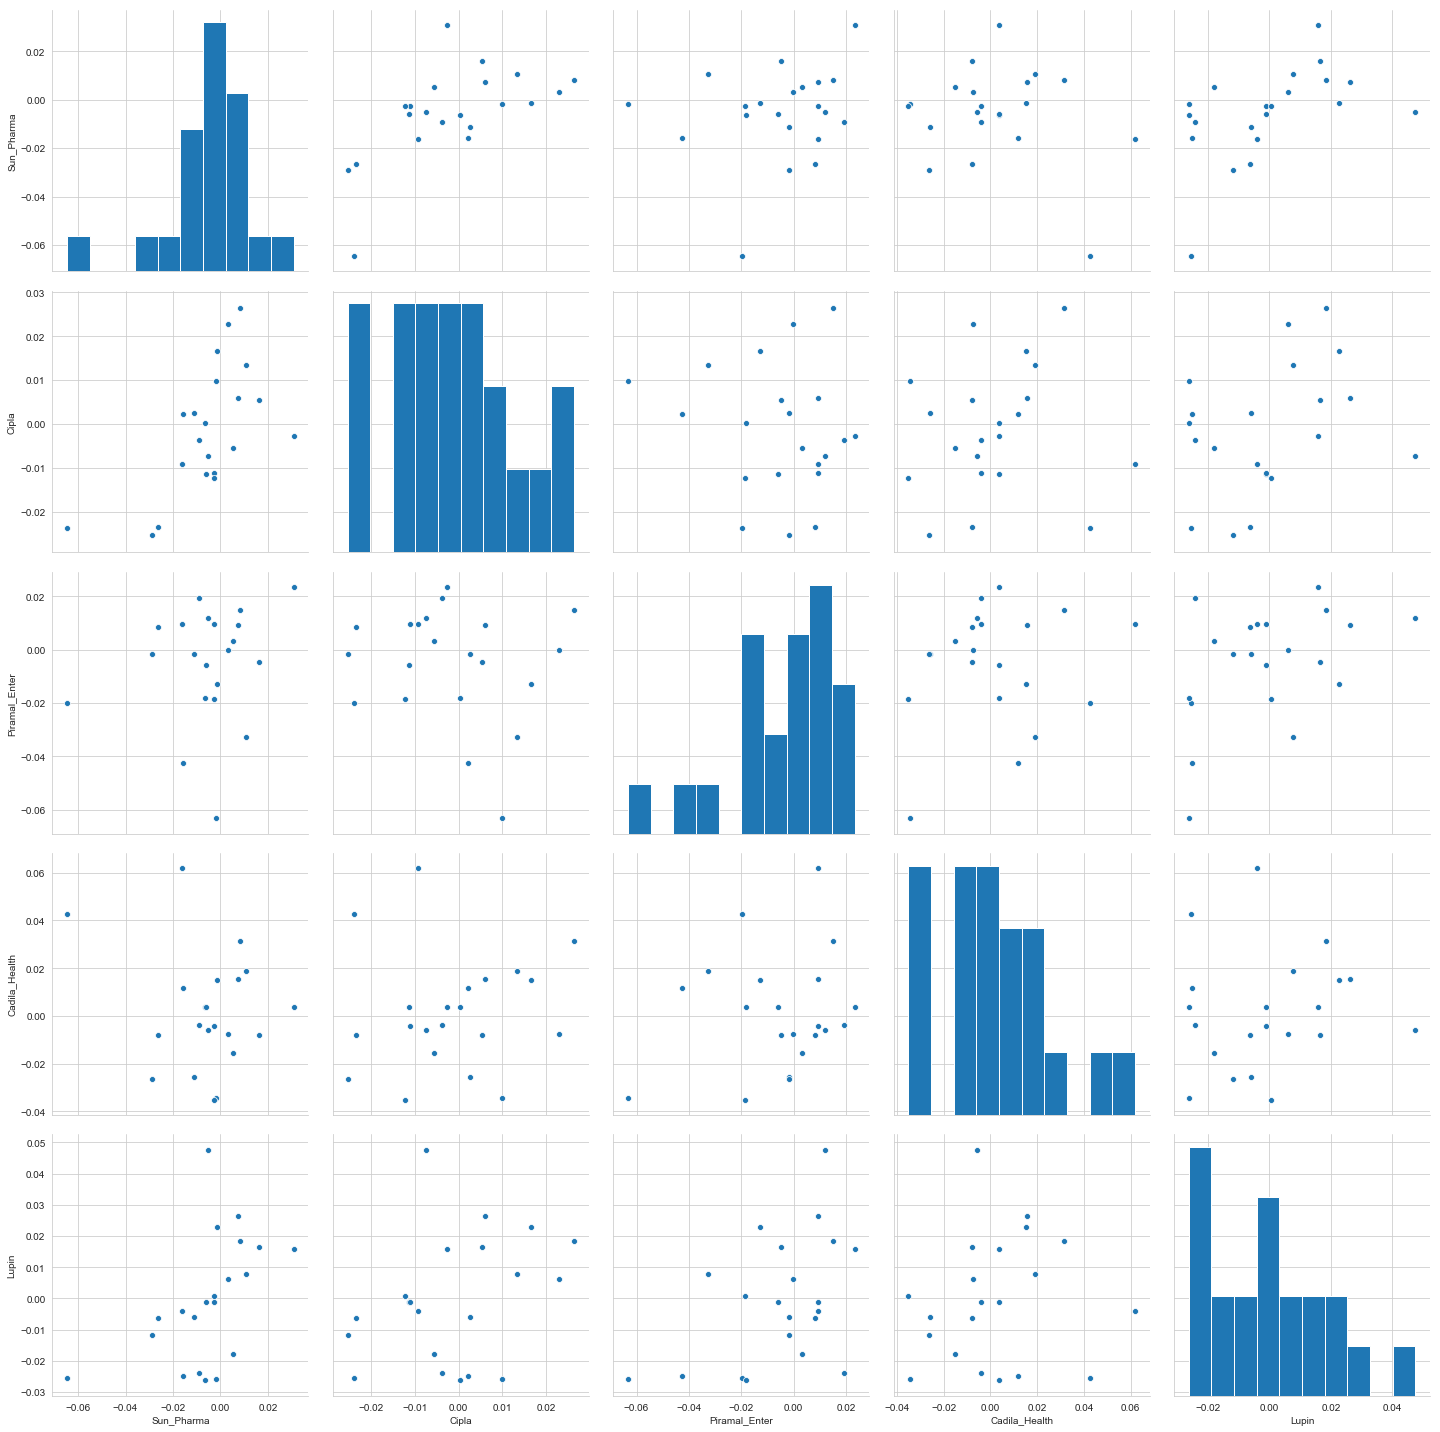

In [19]:
sns.pairplot(rets.dropna(),height=4)

# Correlation Matrix

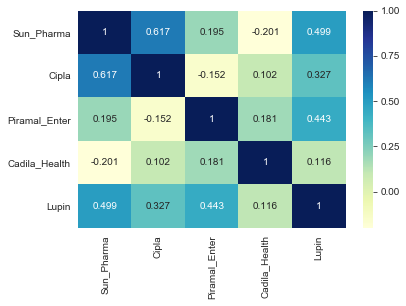

In [20]:
sns.heatmap(rets.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

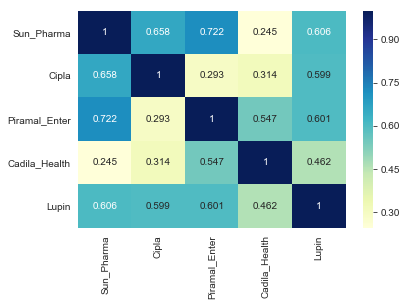

In [21]:
sns.heatmap(close_df.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

<H2> Risk Return Analysis

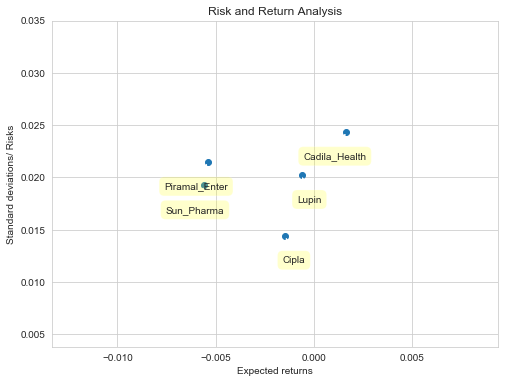

In [22]:
fig, ax = pt.subplots(figsize=(8,6))
pt.scatter(rets.mean(), rets.std())
pt.xlabel('Expected returns')
pt.ylabel('Standard deviations/ Risks')
pt.title('Risk and Return Analysis')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    pt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'top',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.2),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

<h3>Steps for regression</h3>
<li>Construct y (dependent variable series)
<li>Construct matrix (dataframe) of X (independent variable series)
<li>Add intercept
<li>Model the regression
<li>Get the results
<h3>The statsmodels library contains various regression packages. We'll use the OLS (Ordinary Least Squares) model

In [25]:
import numpy as np
import statsmodels.api as sm
X=close_df[['Sun_Pharma','Piramal_Enter','Cadila_Health','Lupin']]
X = sm.add_constant(X)
y=close_df['Cipla']
model = sm.OLS(y,X,missing='drop')             #drop rows with missing values
result = model.fit()                           #adjusts the data to model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Cipla   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     9.708
Date:                Tue, 14 Aug 2018   Prob (F-statistic):           0.000282
Time:                        23:00:42   Log-Likelihood:                -63.556
No. Observations:                  22   AIC:                             137.1
Df Residuals:                      17   BIC:                             142.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           304.0782     53.863      5.645      0.000     190.438     417.719
Sun_Pharma        0.5033      0.119      4.246      0.001       0.253       0.753
Piramal_Enter    -0.0465      0.014     -3.299      0.004      -0.076      -0.017
Cadila_Health     0.2126      0.105      2.025      0.059      -0.009       0.434
Lupin             0.1093      0.059      1.841      0.083      -0.016       0.235
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                1.336
Skew:                          -0.602   Prob(JB):                        0.513
Kurtosis:                       2.920   Cond. No.                     1.49e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3>Plotting the Predicted values and actual values to the model

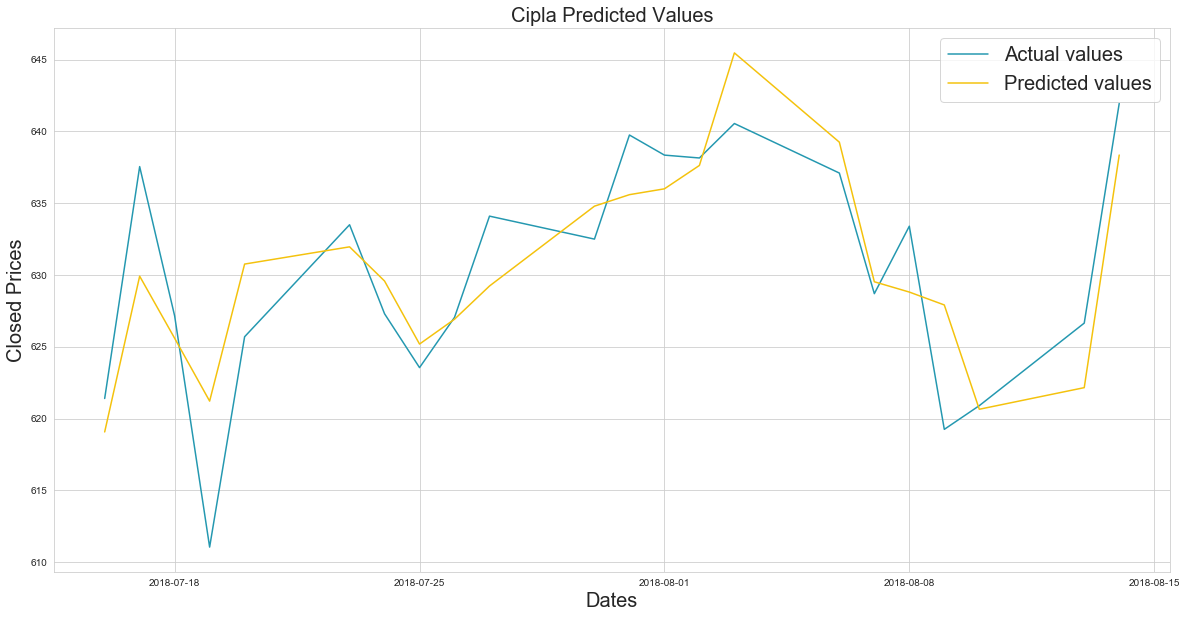

In [26]:
fig, ax = pt.subplots(figsize=(20,10))
ax.plot(y, color="#2498B0", label="Actual values")
ax.plot(result.fittedvalues, color='#f4c20d', label="Predicted values")
ax.set_xlabel('Dates',size=20)
ax.set_ylabel('Closed Prices',size=20)
ax.set_title('Cipla Predicted Values',size=20)
p,q = ax.get_legend_handles_labels()
ax.legend(p, q)
pt.legend(prop={'size':20})